# Naive Bayes

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


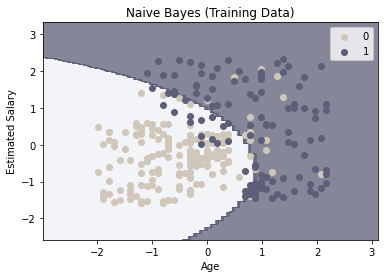

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


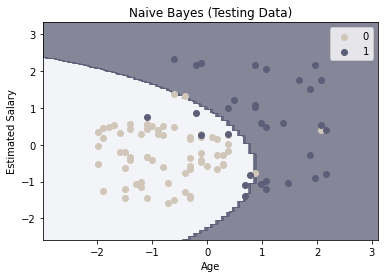

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Loading the datasets and splitting it into testing, training data
dataset = pd.read_csv("datasets/Social_Network_Ads.csv")
X = dataset[["Age", "EstimatedSalary"]]
Y = dataset["Purchased"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0
)

# Standardize features in traing and testing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a Gaussian Naive Bayes classifier and fit it to training data
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

# Predict the Y(Purchased) for testing data
Y_pred = classifier.predict(X_test)


# A function to plot the graphs
def plot(X_set, Y_set, title=""):
    # np.meshgrid generates an n-dimensional grid from n numpy arrays
    X, Y = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.1),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
    )
    # It creates a contourf plot where X, Y are co-ordinates and the classifier's result
    # which is in the shape of X is treated as the height
    # alpha is used to set opacity of the filled contours
    plt.contourf(
        X,
        Y,
        classifier.predict(np.array([X.ravel(), Y.ravel()]).T).reshape(X.shape),
        alpha=0.75,
        cmap=ListedColormap(("#eff1f5", "#5c5f77")),
    )
    # It creates a scatter plot for Purchased=True and Purchased=False
    # Y_set==j acts as a mask
    for i, j in enumerate(np.unique(Y_set)):
        plt.scatter(
            X_set[Y_set == j, 0],
            X_set[Y_set == j, 1],
            c=ListedColormap(("#d0c7ba", "#5c5f77"))(i),
            label=j,
        )
    # Labeling of the plot
    plt.title(title)
    plt.xlabel("Age")
    plt.ylabel("Estimated Salary")
    plt.legend()
    plt.show()


# Plot Naive Bayes graphs for training and testing data
plot(X_train, Y_train, "Naive Bayes (Training Data)")
plot(X_test, Y_test, "Naive Bayes (Testing Data)")